In [1]:
import time
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import sys
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/notebooks/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_output_files/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_result_files/"

In [4]:
# data_HepG2 = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_raw.csv")
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4].csv"
files = glob.glob(input_path + os.sep + '*' + os.sep + os.sep + '*' + os.sep + pattern, recursive=True)

In [5]:
# TODO: needs to change in the future
# TODO: process only what is not processed yet
Data = []

for file in files:
    
    filename = os.path.basename(file)
    
    try:
        
        Data_Temp = pd.read_csv(file)
        row_count = Data_Temp.shape[0]
        
        print(f"File: {filename} has {row_count} rows")
        
        Data.append(Data_Temp)
            
    except Exception as e:
        
        print(f"Error reading file {filename}: {e}")
        
        
### concat all files together
Data_aggregated = pd.concat(Data)
Data_aggregated = Data_aggregated.reset_index(drop = True)

print("Aggregated Data has shape ", Data_aggregated.shape)

File: C1231_R1.csv has 384 rows
File: C1241_R1.csv has 384 rows
File: C1230_R3.csv has 384 rows
File: C1230_R4.csv has 384 rows
File: C1231_R4.csv has 384 rows
File: C1241_R2.csv has 384 rows
File: C1230_R2.csv has 384 rows
File: C1231_R2.csv has 384 rows
File: C1241_R3.csv has 384 rows
File: C1230_R1.csv has 384 rows
File: C1231_R3.csv has 384 rows
File: C1162_R4.csv has 384 rows
File: C1175_R1.csv has 384 rows
File: C1160_R2.csv has 384 rows
File: C1160_R3.csv has 384 rows
File: C1165_R2.csv has 384 rows
File: C1176_R1.csv has 384 rows
File: C1167_R1.csv has 384 rows
File: C1166_R1.csv has 384 rows
File: C1158_R4.csv has 384 rows
File: C1158_R2.csv has 384 rows
File: C1170_R1.csv has 384 rows
File: C1157_R4.csv has 384 rows
File: C1162_R2.csv has 384 rows
File: C1162_R1.csv has 384 rows
File: C1162_R3.csv has 384 rows
File: C1169_R1.csv has 384 rows
File: C1179_R1.csv has 384 rows
File: C1171_R1.csv has 384 rows
File: C1159_R2.csv has 384 rows
File: C1160_R1.csv has 384 rows
File: C1

In [7]:
# Cell Number output for FMP
fmp_figure_path = os.path.join(output_path + os.sep + 'FMP')  

try:
    os.mkdir(fmp_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


In [8]:
FMP_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == 'FMP']
imaging_date_list = FMP_Data_aggregated["Metadata_imaging_date"].unique()
imaging_date_list.sort()

<Figure size 720x720 with 0 Axes>

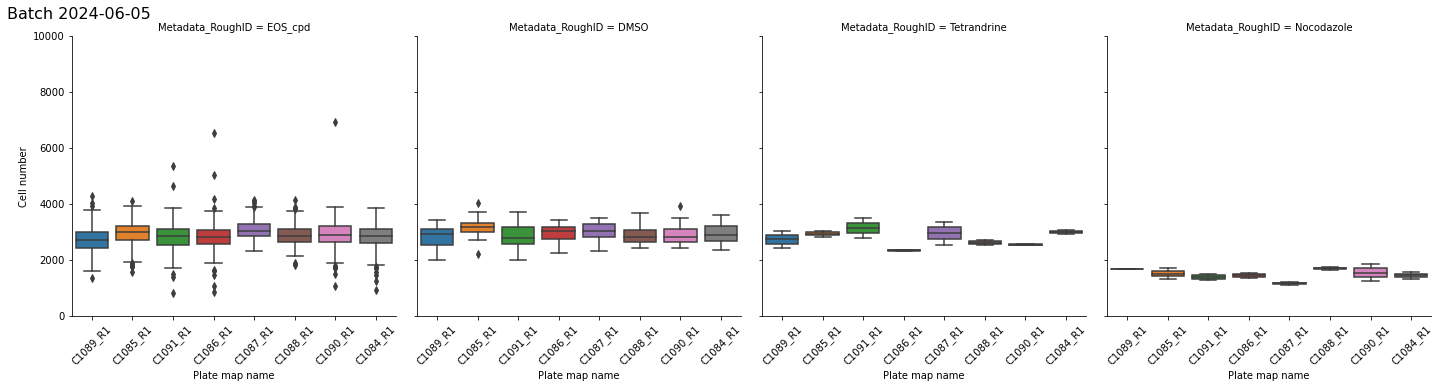

<Figure size 720x720 with 0 Axes>

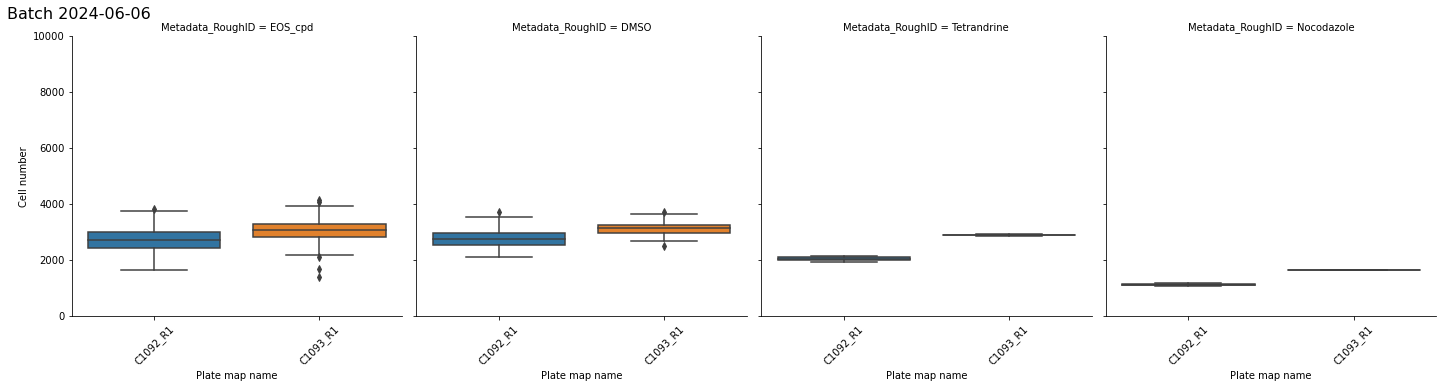

<Figure size 720x720 with 0 Axes>

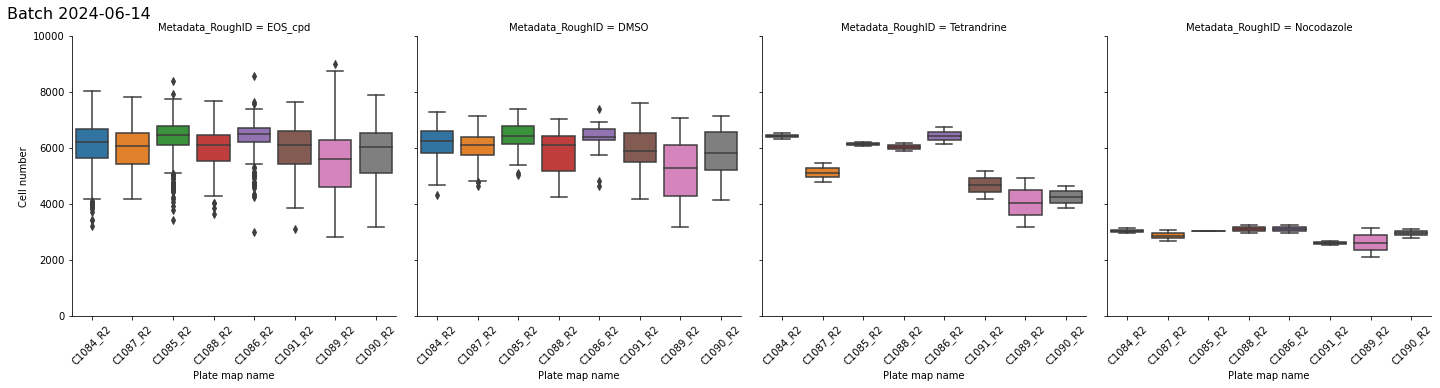

<Figure size 720x720 with 0 Axes>

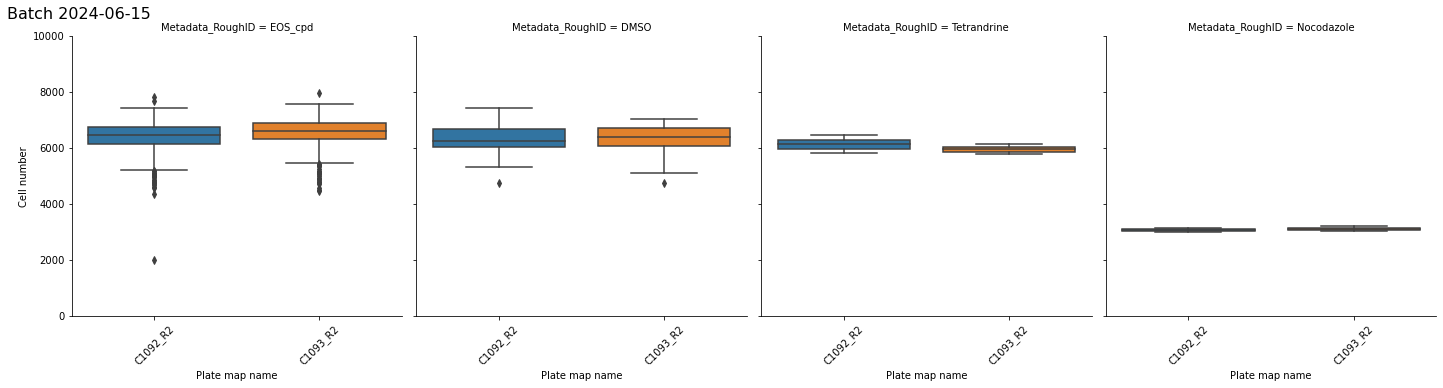

<Figure size 720x720 with 0 Axes>

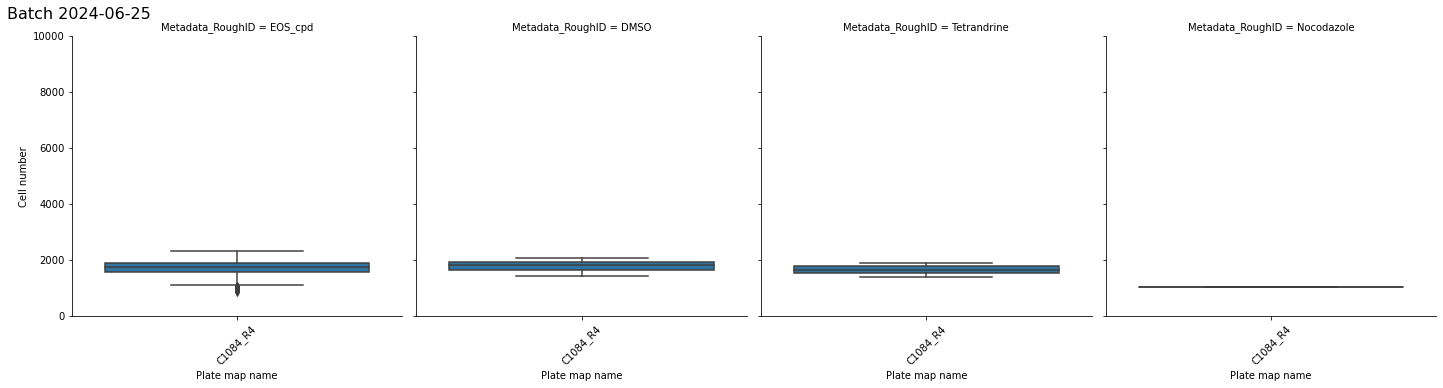

In [9]:
# TODO: Refactor to function
for date in imaging_date_list:
    
    FMP_cell_number = FMP_Data_aggregated.loc[FMP_Data_aggregated["Metadata_imaging_date"] == date]
    
    plt.figure(figsize=(10, 10))
    
    plot = sns.catplot(
        data=FMP_cell_number,
        x='Metadata_plate_map_name',
        y='Metadata_Object_Count',
        kind='box',
        col = 'Metadata_RoughID',
        col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole', ]
    )

    plt.ylabel('Cell number')
    plt.ylim(0, 10000)
    plt.tight_layout()

    plot.set_axis_labels("Plate map name", "Cell number")
    plot.set_xticklabels(rotation=45)
    
    plot.fig.subplots_adjust(top=0.9)
    plot.fig.suptitle('Batch ' + date, fontsize=16, x = 0.05)

    plt.savefig(fmp_figure_path + os.sep + date + '_' + 'FMP_cell_number_controls.pdf', format='pdf', bbox_inches = "tight")

In [10]:
# Cell Number output for FMP
usc_figure_path = os.path.join(output_path + os.sep + 'USC')  

try:
    os.mkdir(usc_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


In [11]:
USC_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == 'USC']

imaging_date_list = USC_Data_aggregated["Metadata_imaging_date"].unique()
imaging_date_list.sort()

<Figure size 1008x504 with 0 Axes>

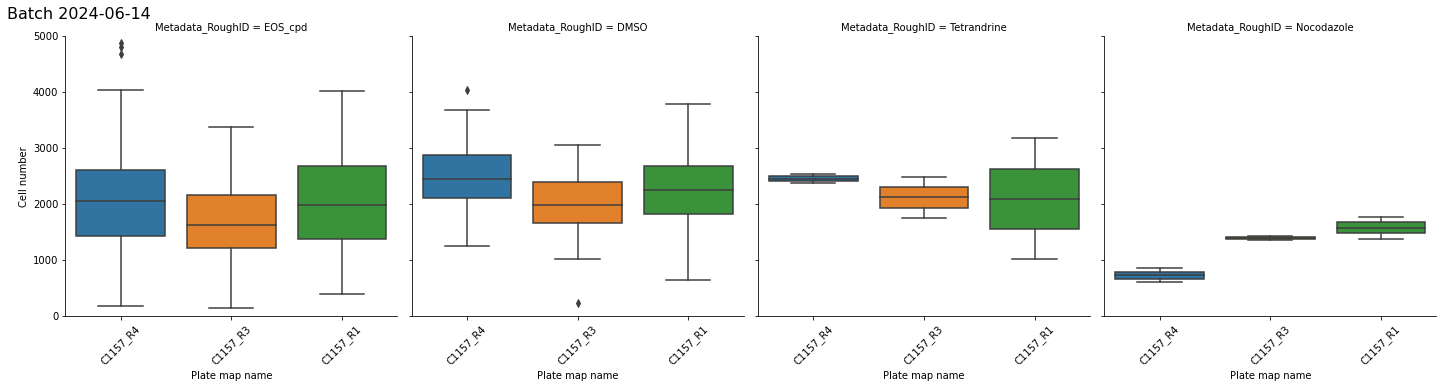

<Figure size 1008x504 with 0 Axes>

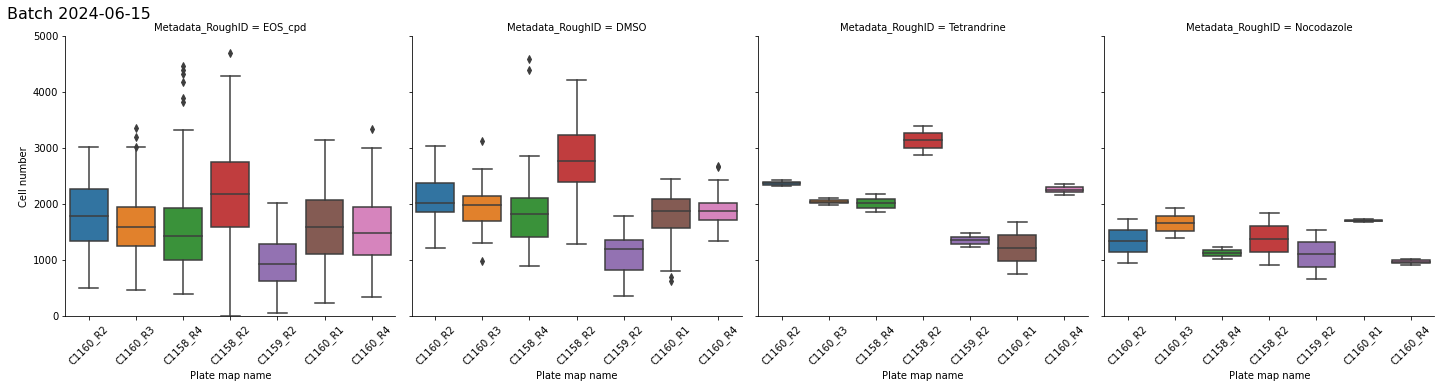

<Figure size 1008x504 with 0 Axes>

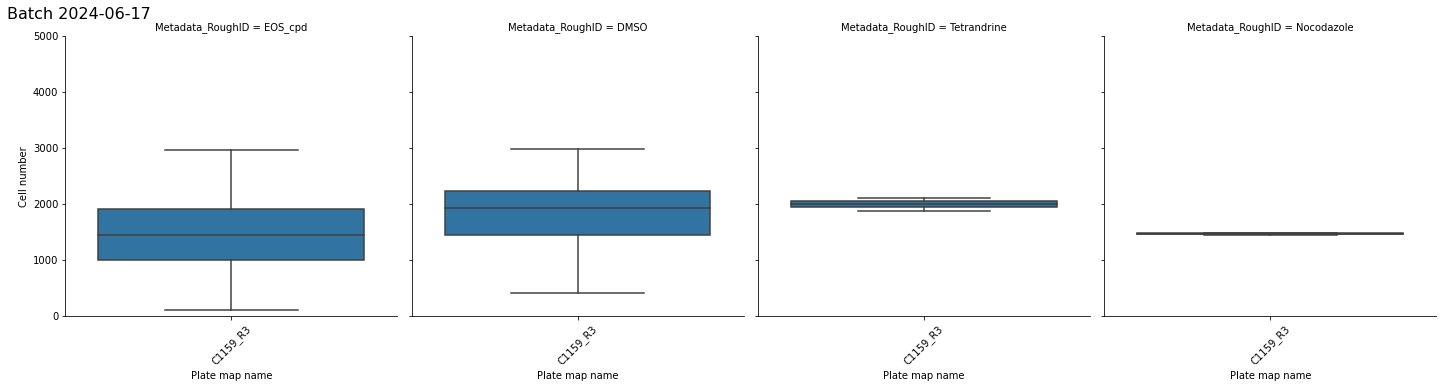

<Figure size 1008x504 with 0 Axes>

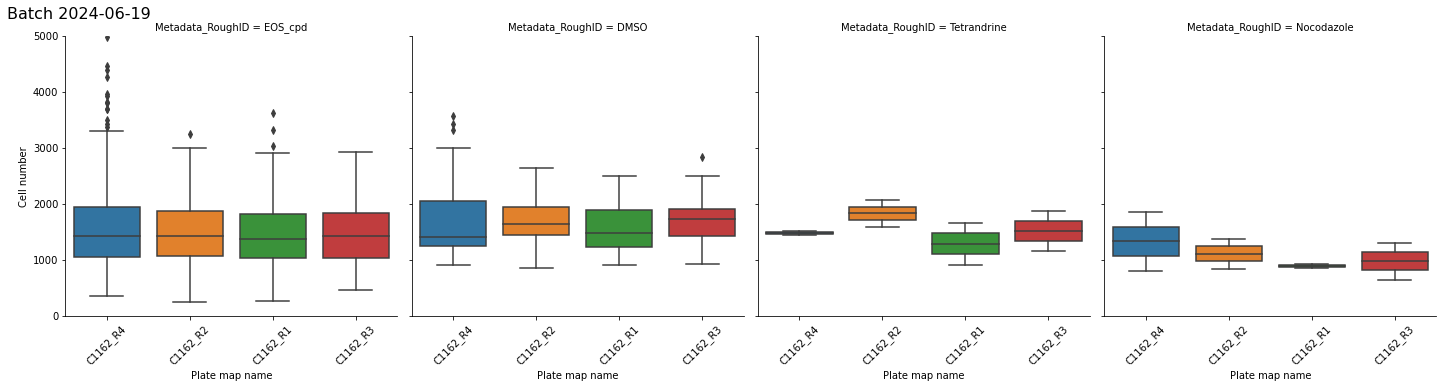

<Figure size 1008x504 with 0 Axes>

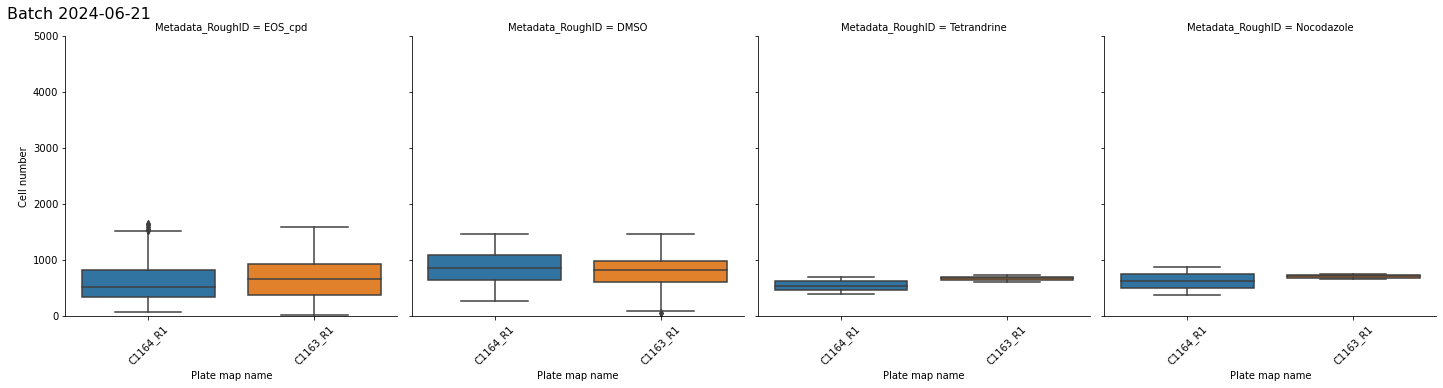

<Figure size 1008x504 with 0 Axes>

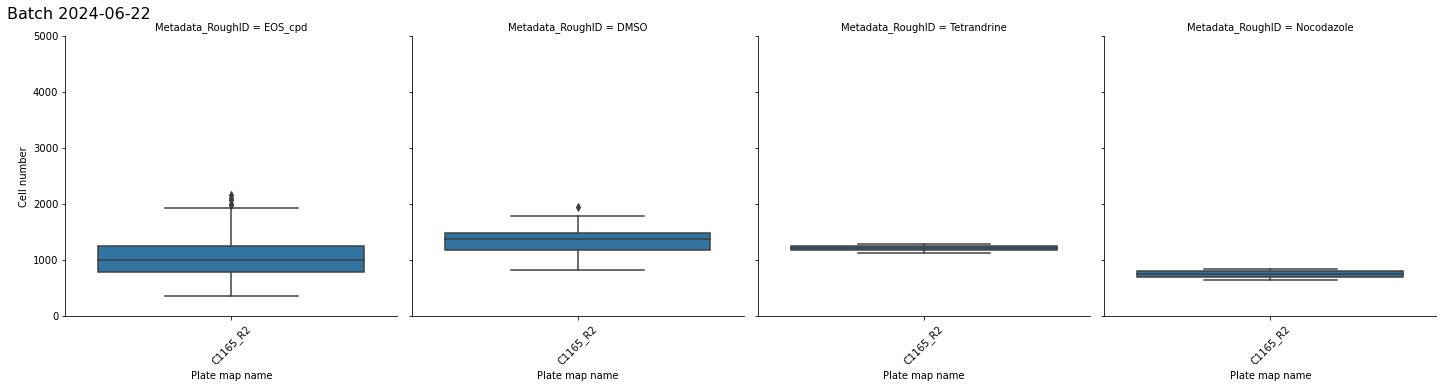

<Figure size 1008x504 with 0 Axes>

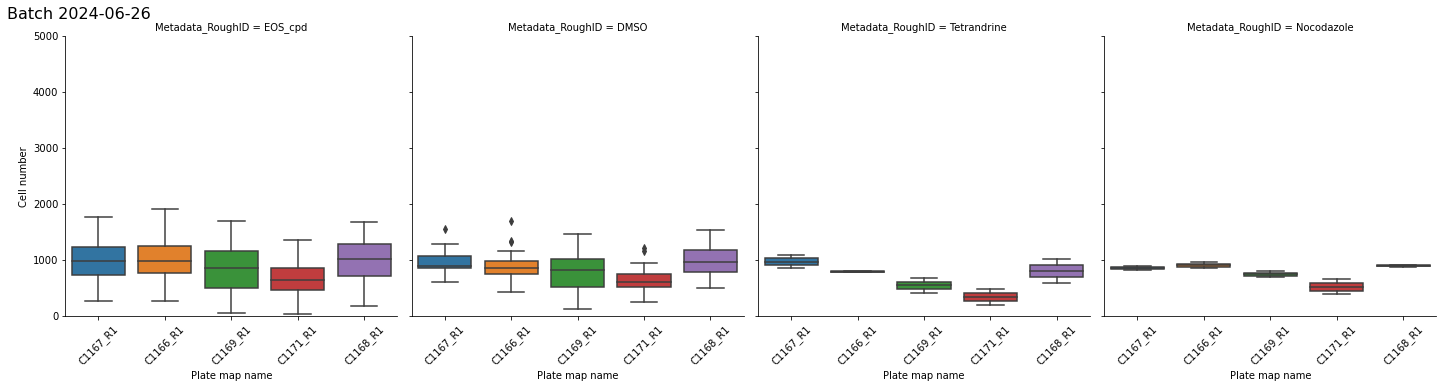

<Figure size 1008x504 with 0 Axes>

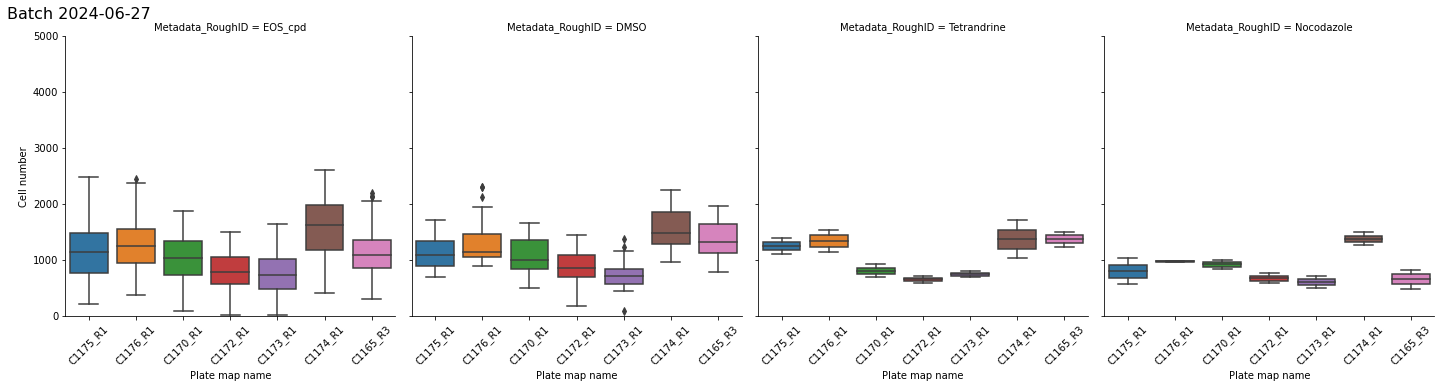

<Figure size 1008x504 with 0 Axes>

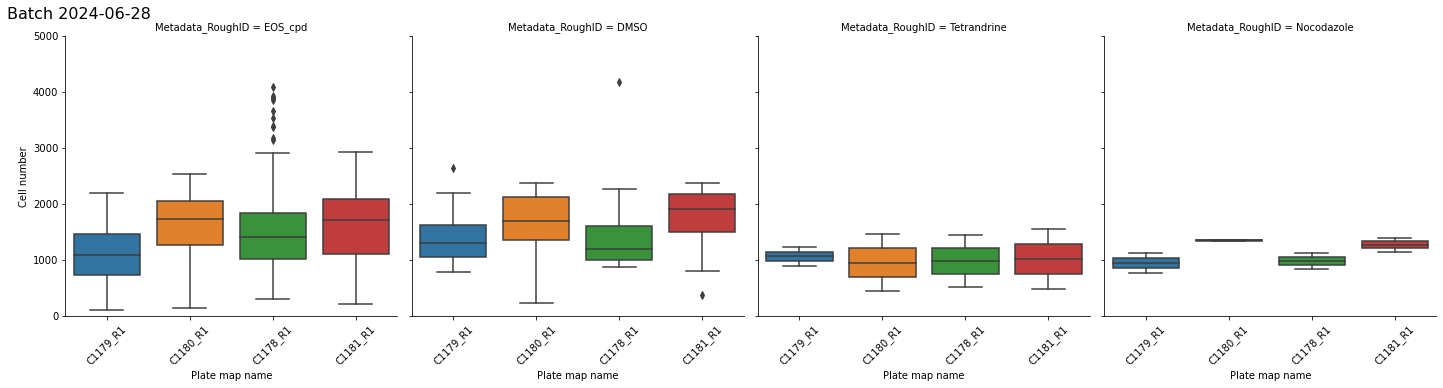

In [12]:
# TODO: Imaging date and batch number might need to be adjusted. 
# TODO: If imaged over midnight. It should belong to the previous batch
for date in imaging_date_list:
    
    USC_cell_number = USC_Data_aggregated.loc[USC_Data_aggregated["Metadata_imaging_date"] == date]
    
    plt.figure(figsize=(14, 7))
    
    plot = sns.catplot(
        data=USC_cell_number,
        x='Metadata_plate_map_name',
        y='Metadata_Object_Count',
        kind='box',
        col = 'Metadata_RoughID',
        col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole', ]
    )

    plt.ylabel('Cell number')
    plt.ylim(0, 5000)
    
    #plot.set_titles("{col_name} {col_var}")

    plot.set_axis_labels("Plate map name", "Cell number")
    plot.set_xticklabels(rotation=45)
    
    plot.fig.subplots_adjust(top=0.9)
    plot.fig.suptitle('Batch ' + date, fontsize=16, x = 0.05)

    plt.savefig(usc_figure_path + os.sep + date + '_' + 'USC_cell_number_controls.pdf', format='pdf',  bbox_inches = "tight")

In [13]:
# Cell Number output for FMP
IMTM_figure_path = os.path.join(output_path + os.sep + 'IMTM')  

try:
    os.mkdir(IMTM_figure_path)

except OSError as error:
    print("Error: directory cannot be created") 

Error: directory cannot be created


In [14]:
IMTM_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == 'IMTM']

imaging_date_list = IMTM_Data_aggregated["Metadata_imaging_date"].unique()
imaging_date_list.sort()

In [15]:
IMTM_Data_aggregated 

,Metadata_Batch,Metadata_Plate,Metadata_Well_randomized,Metadata_Object_Count,Nuc_AreaShape_Area,Nuc_AreaShape_BoundingBoxArea,Nuc_AreaShape_BoundingBoxMaximum_X,Nuc_AreaShape_BoundingBoxMaximum_Y,Nuc_AreaShape_BoundingBoxMinimum_X,Nuc_AreaShape_BoundingBoxMinimum_Y,...,Metadata_plate_map_name,Metadata_user,Metadata_source,Metadata_instrument,Metadata_imaging_date,Metadata_imaging_time,Metadata_imaging_timezone,Metadata_picklist_name,Metadata_Well,Metadata_RoughID
0,HepG2_10uM,C1231R1,A01,572,412.0,560.0,518.0,516.5,490.0,491.5,...,C1231_R1,Alzbeta,IMTM,CV8000,2024-06-05,12:02:30,200,Picklist_Replicate1.csv,O02,EOS_cpd
1,HepG2_10uM,C1231R1,A02,731,409.0,567.0,493.0,492.0,465.0,468.0,...,C1231_R1,Alzbeta,IMTM,CV8000,2024-06-05,12:02:30,200,Picklist_Replicate1.csv,K17,EOS_cpd
2,HepG2_10uM,C1231R1,A03,826,411.0,563.5,518.0,506.0,491.0,482.0,...,C1231_R1,Alzbeta,IMTM,CV8000,2024-06-05,12:02:30,200,Picklist_Replicate1.csv,I19,EOS_cpd
3,HepG2_10uM,C1231R1,A04,786,420.0,567.0,418.5,573.0,393.5,548.0,...,C1231_R1,Alzbeta,IMTM,CV8000,2024-06-05,12:02:30,200,Picklist_Replicate1.csv,B09,EOS_cpd
4,HepG2_10uM,C1231R1,A05,745,400.0,546.0,546.0,524.0,522.0,499.0,...,C1231_R1,Alzbeta,IMTM,CV8000,2024-06-05,12:02:30,200,Picklist_Replicate1.csv,N10,EOS_cpd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,HepG2_10uM,C1231R3,P20,815,412.0,550.0,525.0,498.0,499.0,470.0,...,C1231_R3,Alzbeta,IMTM,CV8000,2024-06-05,14:46:11,200,Picklist_Replicate3.csv,B02,EOS_cpd
4220,HepG2_10uM,C1231R3,P21,843,405.0,552.0,460.0,513.0,439.0,486.0,...,C1231_R3,Alzbeta,IMTM,CV8000,2024-06-05,14:46:11,200,Picklist_Replicate3.csv,O19,EOS_cpd
4221,HepG2_10uM,C1231R3,P22,775,409.0,570.0,545.0,485.0,519.0,460.0,...,C1231_R3,Alzbeta,IMTM,CV8000,2024-06-05,14:46:11,200,Picklist_Replicate3.csv,A21,EOS_cpd
4222,HepG2_10uM,C1231R3,P23,742,408.0,552.0,487.0,568.0,462.0,541.0,...,C1231_R3,Alzbeta,IMTM,CV8000,2024-06-05,14:46:11,200,Picklist_Replicate3.csv,A15,EOS_cpd


<Figure size 1008x504 with 0 Axes>

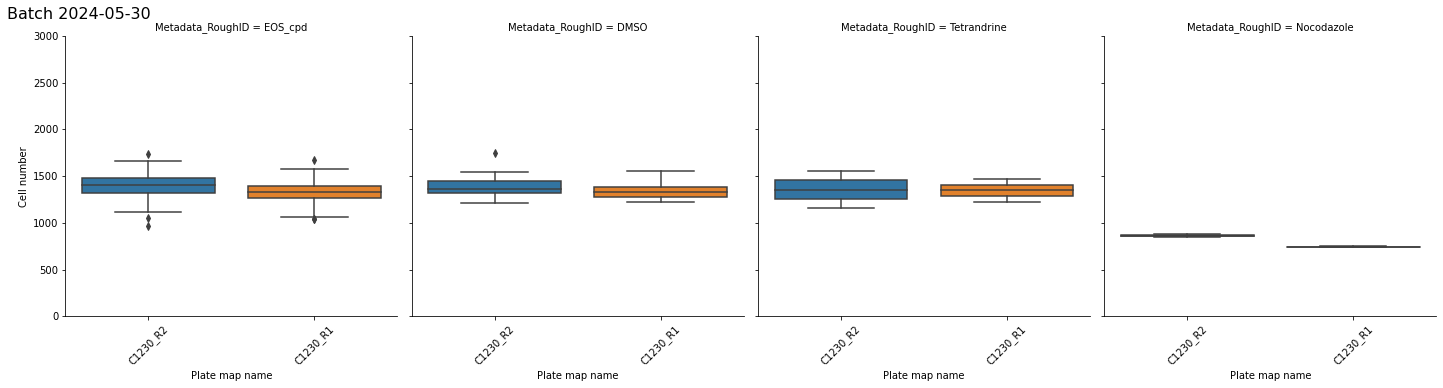

<Figure size 1008x504 with 0 Axes>

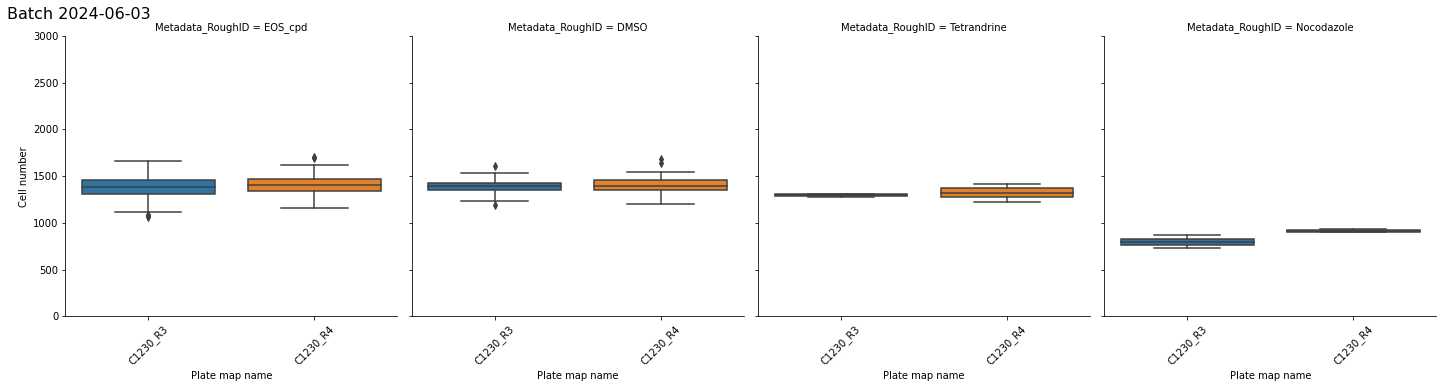

<Figure size 1008x504 with 0 Axes>

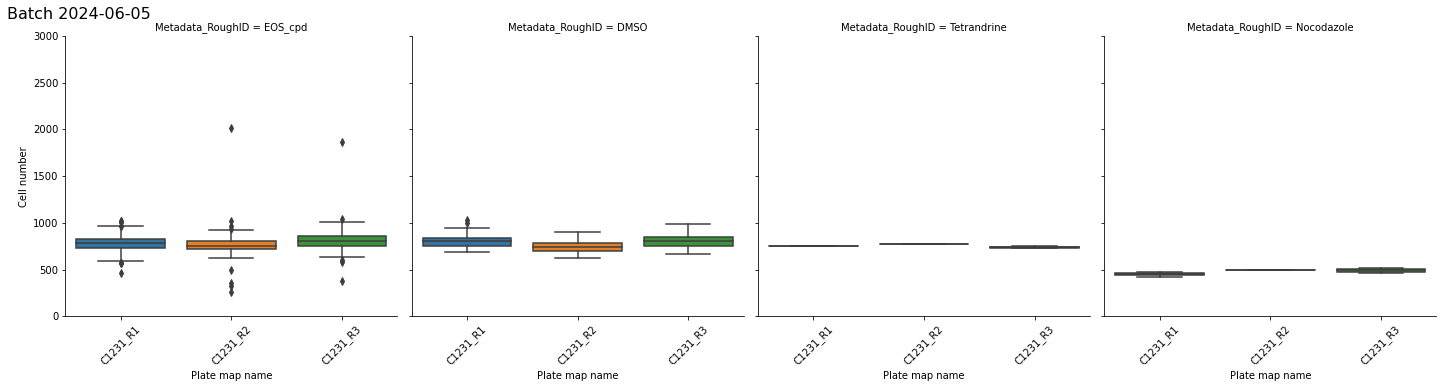

<Figure size 1008x504 with 0 Axes>

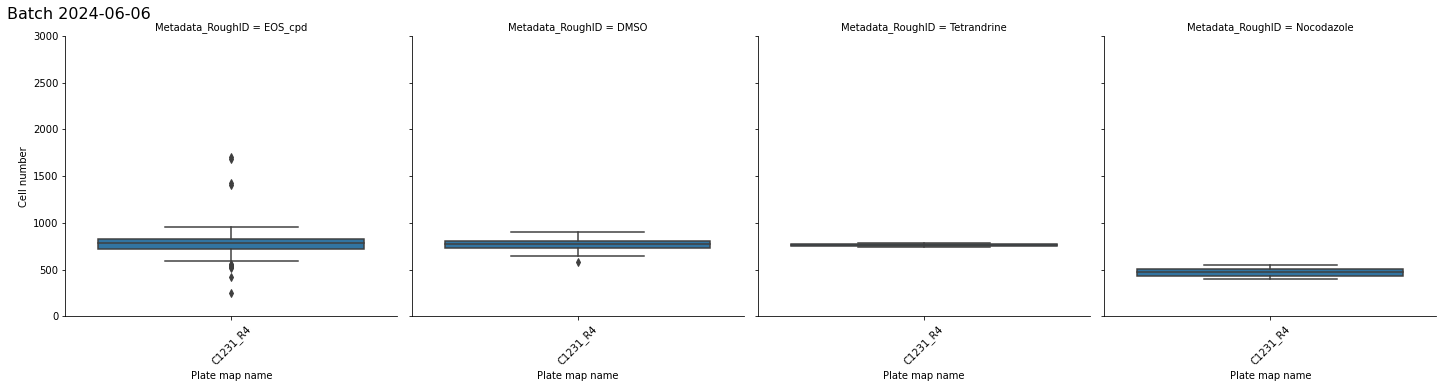

<Figure size 1008x504 with 0 Axes>

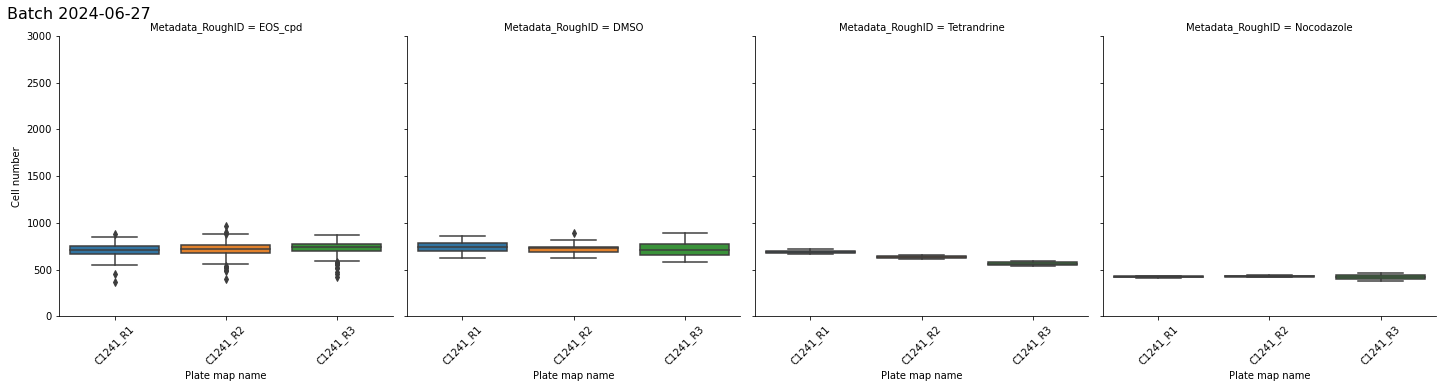

In [16]:
for date in imaging_date_list:
    
    IMTM_cell_number = IMTM_Data_aggregated.loc[IMTM_Data_aggregated["Metadata_imaging_date"] == date]
    
    plt.figure(figsize=(14, 7))
    
    plot = sns.catplot(
        data=IMTM_cell_number,
        x='Metadata_plate_map_name',
        y='Metadata_Object_Count',
        kind='box',
        col = 'Metadata_RoughID',
        col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole', ]
    )

    plt.ylabel('Cell number')
    plt.ylim(0, 3000)
    
    #plot.set_titles("{col_name} {col_var}")

    plot.set_axis_labels("Plate map name", "Cell number")
    plot.set_xticklabels(rotation=45)
    
    plot.fig.subplots_adjust(top=0.9)
    plot.fig.suptitle('Batch ' + date, fontsize=16, x = 0.05)

    plt.savefig(IMTM_figure_path + os.sep + date + '_' + 'IMTM_cell_number_controls.pdf', format='pdf',  bbox_inches = "tight")

# Trials based on raw profiles

In [ ]:
# TODO: QC if plate layout is correct - based on pos. / neg. controls
# First QC: Plate layout
# Check if neg. controls are neg. controls
# Check if pos. controls are at the right place
# Differences are expected in terms of profiles as well as cell numbers
# We should check correlation of profiles primarily. 
# Then additionally produce cell number as a second level check, if in doubt

In [ ]:
# TODO: Remove blocked features >> JUMP CP
# We cannot work with feature reduction at this point. 
# Better to exclude features that are not good or have been shown to not be reproducible.
# Maybe use the set from the bioactives
# Features that are highly correlating here could muddy the water so too speak

In [ ]:
Features = CBE.get_feature_vector(dataframe)

# Correlation distance 

In [ ]:
from scipy.spatial.distance import correlation

In [ ]:
# Tetrandrine

In [ ]:
# Filter for pos. control tetrandrine
# Metadata_RoughID = Tetrandrine
# Should be C24 and D24
tetrandrine_dataframe = dataframe.loc[dataframe['Metadata_RoughID'] == 'Tetrandrine']
tetrandrine_well_1_features = tetrandrine_dataframe.iloc[0][Features].values
tetrandrine_well_2_features = tetrandrine_dataframe.iloc[1][Features].values
tetrandrine_median_features = tetrandrine_dataframe[Features].median(axis=0)

corr_tetrandrine = correlation(tetrandrine_well_1_features, tetrandrine_well_2_features, centered = True)
corr_tetrandrine

In [ ]:
corr_tetrandrine = correlation(tetrandrine_well_1_features, tetrandrine_well_1_features, centered = True)
corr_tetrandrine

In [ ]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
nocodazole_dataframe = dataframe.loc[dataframe['Metadata_RoughID'] == 'Nocodazole']
nocodazole_well_1_features = nocodazole_dataframe.iloc[0][Features].values
nocodazole_well_2_features = nocodazole_dataframe.iloc[1][Features].values
nocodazole_median_features = nocodazole_dataframe[Features].median(axis=0)

corr_nocodazole = correlation(nocodazole_well_1_features, nocodazole_well_2_features, centered = True)
corr_nocodazole

In [ ]:
corr_pos_ctrl_1 = correlation(tetrandrine_well_1_features, nocodazole_well_1_features, centered = True)
corr_pos_ctrl_1

In [ ]:
corr_pos_ctrl_2 = correlation(tetrandrine_well_1_features, nocodazole_well_2_features, centered = True)
corr_pos_ctrl_2

In [ ]:
corr_pos_ctrl_3 = correlation(tetrandrine_well_2_features, nocodazole_well_2_features, centered = True)
corr_pos_ctrl_3

In [ ]:
corr_pos_ctrl_4 = correlation(tetrandrine_well_2_features, nocodazole_well_1_features, centered = True)
corr_pos_ctrl_4

In [ ]:
corr_pos_ctrl_median = correlation(tetrandrine_median_features, nocodazole_median_features, centered = True)
corr_pos_ctrl_median

In [ ]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
dmso_dataframe = dataframe.loc[dataframe['Metadata_RoughID'] == 'DMSO']
dmso_median_features = dmso_dataframe[Features].median(axis=0)

corr_noco_dmso = correlation(nocodazole_median_features, dmso_median_features, centered = True)
corr_noco_dmso

In [ ]:
corr_tet_dmso = correlation(tetrandrine_median_features, dmso_median_features, centered = True)
corr_tet_dmso

# Correlation

In [ ]:
np.corrcoef(tetrandrine_median_features, nocodazole_median_features)

In [ ]:
np.corrcoef(tetrandrine_well_1_features.astype(float), tetrandrine_well_2_features.astype(float))

In [ ]:
np.corrcoef(nocodazole_well_1_features.astype(float), nocodazole_well_2_features.astype(float))

# Use raw values: subtraction and sum

In [ ]:
# Based on indivdual values
difference_tetrandrine = tetrandrine_dataframe.iloc[0][Features] - tetrandrine_dataframe.iloc[1][Features]
difference_tetrandrine.sum()

In [ ]:
# Based on indivdual values
difference_nocodazole = nocodazole_dataframe.iloc[0][Features] - nocodazole_dataframe.iloc[1][Features]
difference_nocodazole.sum()

In [ ]:
# Based on indivdual values
corr_pos_ctrl_1 = tetrandrine_dataframe.iloc[0][Features] - nocodazole_dataframe.iloc[0][Features]
corr_pos_ctrl_1.sum()

In [ ]:
# Based on indivdual values
corr_pos_ctrl_2 = tetrandrine_dataframe.iloc[1][Features] - nocodazole_dataframe.iloc[0][Features]
corr_pos_ctrl_2.sum()

In [ ]:
# Based on indivdual values
corr_pos_ctrl_3 = tetrandrine_dataframe.iloc[1][Features] - nocodazole_dataframe.iloc[1][Features]
corr_pos_ctrl_3.sum()

In [ ]:
# Based on indivdual values
corr_pos_ctrl_4 = tetrandrine_dataframe.iloc[0][Features] - nocodazole_dataframe.iloc[1][Features]
corr_pos_ctrl_4.sum()

In [ ]:
# Based on indivdual values
corr_pos_ctrl_test = tetrandrine_dataframe.iloc[0][Features] - tetrandrine_dataframe.iloc[0][Features]
corr_pos_ctrl_test.sum()

In [ ]:
# Filter neg. ctrl DMSO
# Metadata_RoughID = DMSO
# A23 - P23
# E24 - P24
dataframe.loc[dataframe['Metadata_RoughID'] == 'DMSO']

# Raw DMSO value comparison

In [ ]:
# Maybe for the raw processing better focus on the DMSO profiles
# Create medians or averages of DMSO profiles and compare to reference
# TODO: Comparison of raw / median DMSO profiles to older bioactives 
# TODO: Per site